In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
#import plotly as pl
import datetime as dt
import re
sns.set_style('darkgrid')
%matplotlib inline
py.style.use('ggplot')
np.random.seed(42)

In [135]:
df=pd.read_csv('takehome_user_engagement.csv',encoding = "ISO-8859-1")
df.head()
len(df['user_id'].unique())

8823

In [136]:
df2=pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [137]:
users=pd.DataFrame(columns = ['id', 'adopted'])
grouped=df.groupby('user_id')


for i in grouped.groups.keys(): 
    dfn=grouped.get_group(i)
    dfn=dfn.set_index(pd.to_datetime(dfn['time_stamp']))
    dfn=dfn.drop('time_stamp',axis=1)
    news=dfn.rolling('7D').sum()['visited'].values
    adpt=0
    if max(news)>=3:
        adpt=1
    users=users.append({'id': i, 'adopted':adpt},ignore_index=True)        


In [153]:
users
df5=pd.merge(users, df2, how='inner', left_on='id', right_on='object_id')

In [163]:
df6=df5.drop(['object_id','name','email','last_session_creation_time'],axis=1)
df6['invited_by_user_id']=df6['invited_by_user_id'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [164]:
df6['creat_year']=pd.DatetimeIndex(df6['creation_time']).year

df6['creat_month']=pd.DatetimeIndex(df6['creation_time']).month

dftarg=df6['adopted']
df6=df6.drop(['creation_time','id','adopted'],axis=1)
df6

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creat_year,creat_month
0,GUEST_INVITE,1,0,11,1,2014,4
1,ORG_INVITE,0,0,1,1,2013,11
2,ORG_INVITE,0,0,94,1,2013,3
3,GUEST_INVITE,0,0,1,1,2013,5
4,GUEST_INVITE,0,0,193,1,2013,1
5,GUEST_INVITE,0,0,197,1,2013,12
6,SIGNUP,0,1,37,0,2012,12
7,ORG_INVITE,1,1,318,1,2013,1
8,SIGNUP,0,0,69,0,2013,12
9,ORG_INVITE,0,0,254,1,2014,3


In [165]:
df7=pd.get_dummies(df6)
df7

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creat_year,creat_month,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,1,2014,4,1,0,0,0,0
1,0,0,1,1,2013,11,0,1,0,0,0
2,0,0,94,1,2013,3,0,1,0,0,0
3,0,0,1,1,2013,5,1,0,0,0,0
4,0,0,193,1,2013,1,1,0,0,0,0
5,0,0,197,1,2013,12,1,0,0,0,0
6,0,1,37,0,2012,12,0,0,0,1,0
7,1,1,318,1,2013,1,0,1,0,0,0
8,0,0,69,0,2013,12,0,0,0,1,0
9,0,0,254,1,2014,3,0,1,0,0,0


In [174]:
dftarg=dftarg.astype('int')

In [207]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import scale
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(df7, dftarg)

In [208]:
# Apply logistic regression and print scores
lr = LogisticRegression(class_weight='balanced')


lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5738249962218528
0.5802357207615594
[[1071  741]
 [ 185  209]]
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      1812
           1       0.22      0.53      0.31       394

    accuracy                           0.58      2206
   macro avg       0.54      0.56      0.50      2206
weighted avg       0.74      0.58      0.63      2206



C:\Users\hasan.rizvi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [224]:
coefs = lr.coef_

No handles with labels found to put in legend.


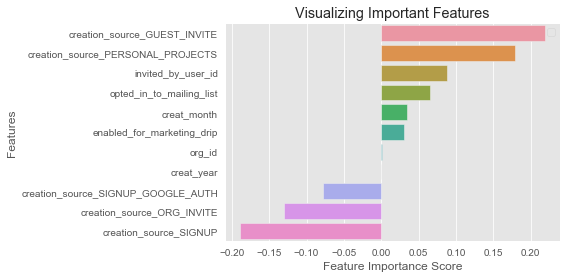

In [225]:
feature_imp = pd.Series(coefs[0],index=df7.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp[0:30], y=feature_imp.index[0:30])
# Add labels to your graph
py.xlabel('Feature Importance Score')
py.ylabel('Features')
py.title("Visualizing Important Features")
py.legend()
py.show()

In [222]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.optimizers import Adadelta
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = MinMaxScaler(feature_range=(0, 1))

def get_callbacks(filepath, patience=5):
    lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=1e-5, patience=patience, verbose=1)
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [lr_reduce, msave]
callbacks = get_callbacks(filepath='model_weight_SGD.hdf5', patience=6)

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=1e-5, patience=6, verbose=1)
# Convert the target to categorical: target
#target = to_categorical(df.survived)
predictors1=df7.values
target = to_categorical(dftarg)

#predictors = X_scaler.fit_transform(predictors1)
predictors=predictors1


n_cols=predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

my_optimizer = adam(lr=.01)
# Compile the model
model.compile(optimizer=my_optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#loss='categorical_crossentropy'

# Fit the model
model.fit(predictors, target, epochs=60,validation_split=0.3,callbacks=callbacks)

Train on 6176 samples, validate on 2647 samples
Epoch 1/60
6176/6176 [==============================] - 1s 157us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 2/60
6176/6176 [==============================] - 0s 46us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 3/60
6176/6176 [==============================] - 0s 46us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 4/60
6176/6176 [==============================] - 0s 45us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 5/60
6176/6176 [==============================] - 0s 45us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 6/60
6176/6176 [==============================] - 0s 44us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc: 0.1836
Epoch 7/60
6176/6176 [==============================] - 0s 50us/step - loss: 13.2056 - acc: 0.1807 - val_loss: 13.1587 - val_acc:

In [226]:
pd.DataFrame(model.predict(predictors).round()).describe()

,0,1
count,8823.0,8823.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,1.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,1.0
max,0.0,1.0
